### This is the Capstone Project in partial fulfillment of the Kaggle 5 day Intensive Course on Generative AI. 
On the ocassion of **World Health Day** today. I have decided to create a project on Mental Health and Wellbeing using Mental Health dataset.

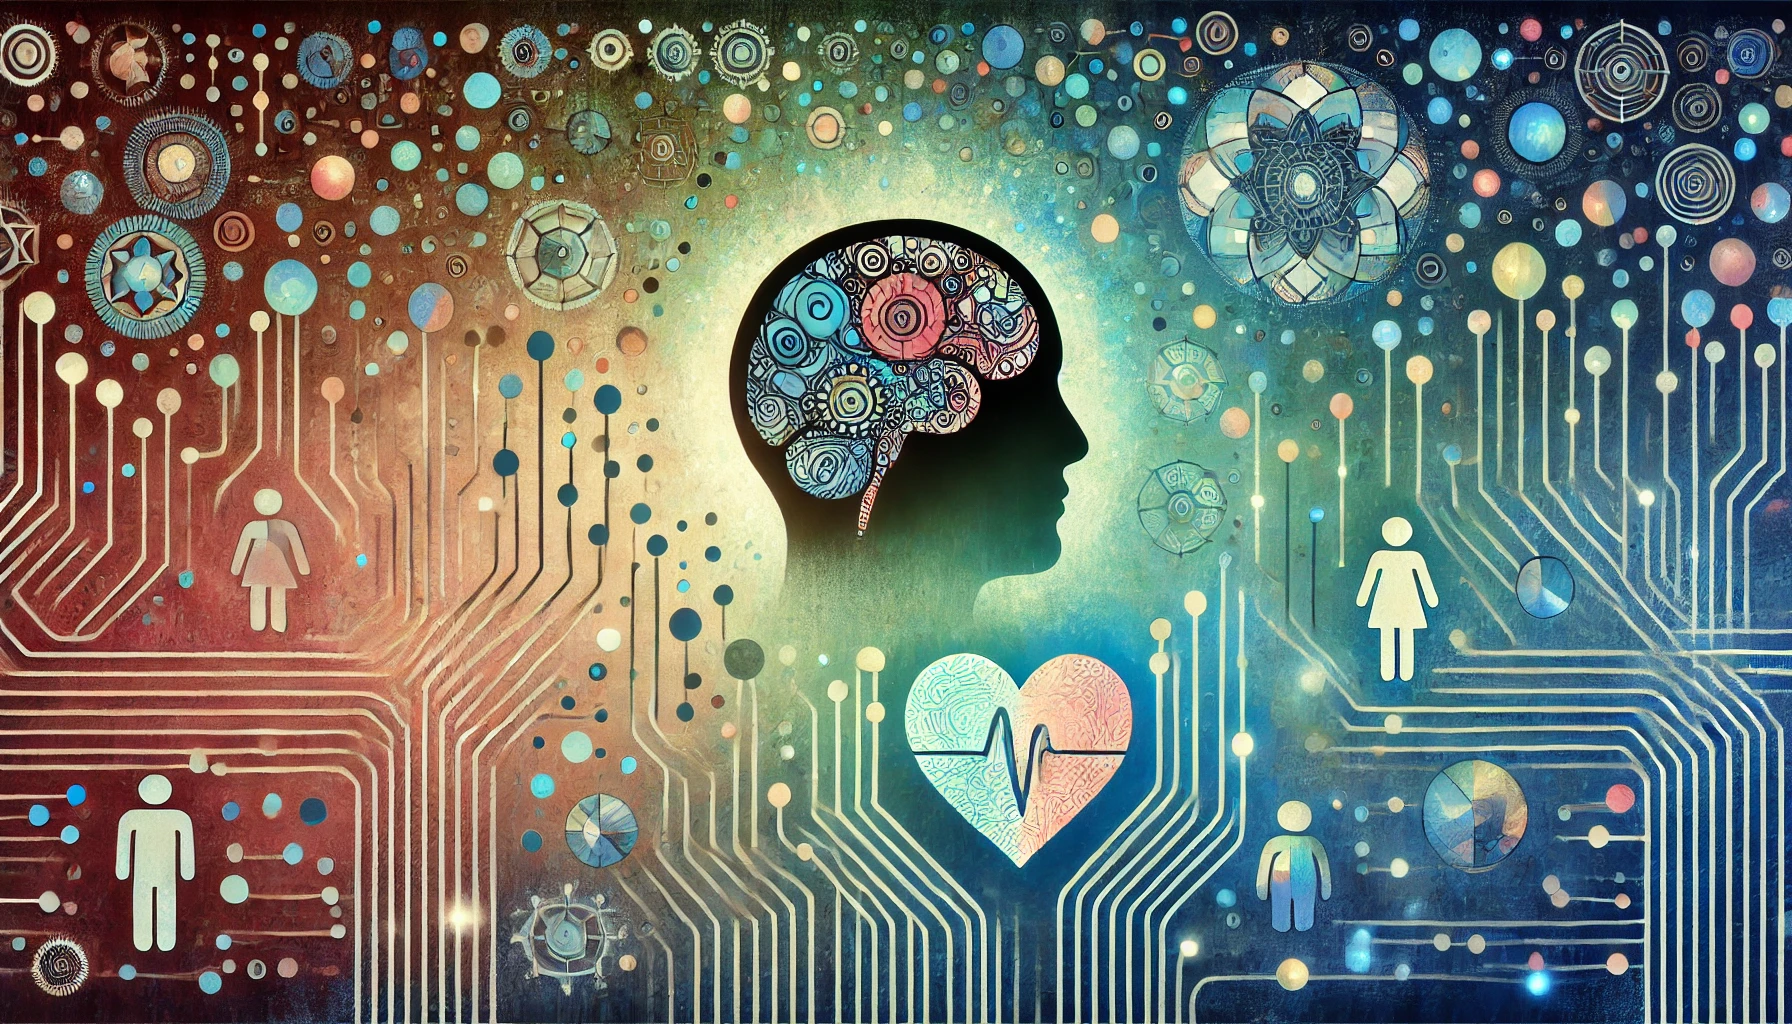

This notebook utilizes generative AI techniques learned from Kaggle's Gen AI Intensive Course (Q1 2025) to analyze mental health data. It classifies textual data to identify potential mental health concerns and assigns a severity score based on prompt engineering techniques.

**Key Components**:

 - Classification of text data using prompt-based generative AI.

 - Assigning severity scores ranging from 1 to 10 to gauge mental health status.

 - Generation of a new feature column categorizing data as Positive, Negative, or Neutral based on severity scoring.

 - Analysis of results to determine the percentage distribution of mental health statuses across the dataset.

 - Suggestions and actionable insights derived from analysis to assist in targeted mental health interventions.

Install the SDK

In [8]:
!pip uninstall -qy jupyterlab  # Remove unused packages from Kaggle's base image that conflict
!pip install -U -q "google-genai==1.7.0"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.7/144.7 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.9/100.9 kB 5.2 MB/s eta 0:00:00


In [11]:
from google import genai
from google.genai import types

from IPython.display import HTML, Markdown, display

Set up a retry helper. This allows you to "Run all" without worrying about per-minute quota.

In [12]:
from google.api_core import retry


is_retriable = lambda e: (isinstance(e, genai.errors.APIError) and e.code in {429, 503})

genai.models.Models.generate_content = retry.Retry(
    predicate=is_retriable)(genai.models.Models.generate_content)

Importing the API key

In [13]:
from kaggle_secrets import UserSecretsClient

GOOGLE_API_KEY = UserSecretsClient().get_secret("GOOGLE_API_KEY")

Test the API key using simple prompt

In [16]:
client = genai.Client(api_key=GOOGLE_API_KEY)

response = client.models.generate_content(
    model="gemini-2.0-flash",
    contents="When is World Health Day and what was the objective of it? Why is it important to pay more attention to Mental Health in Modern day")

Markdown(response.text)

Here's a breakdown of World Health Day and the importance of mental health today:

**When is World Health Day?**

*   World Health Day is observed annually on **April 7th**.

**What was the objective of it?**

*   World Health Day was established by the World Health Organization (WHO) in 1948 and officially celebrated for the first time in 1950.
*   The primary objective of World Health Day is to raise awareness of a specific health theme to highlight a priority area of concern for the WHO. It provides a global opportunity to focus on pressing health challenges facing humanity.
*   The aim is to:
    *   Promote understanding of health issues.
    *   Encourage action by individuals, communities, and governments to improve health outcomes.
    *   Highlight the role of the WHO in global health leadership.

**Why is it important to pay more attention to Mental Health in Modern day?**

Paying attention to mental health in the modern day is crucial for several interconnected reasons:

*   **Prevalence of Mental Health Conditions:** Mental health conditions are incredibly common. Depression, anxiety disorders, bipolar disorder, eating disorders, and substance use disorders affect a significant portion of the global population. These conditions can affect anyone, regardless of age, gender, race, or socioeconomic status.

*   **Impact on Overall Health:** Mental health is integral to overall health. Poor mental health can contribute to chronic physical health problems (e.g., heart disease, diabetes, weakened immune system), and vice versa. It affects your ability to think, feel, and behave.

*   **Economic Impact:** Mental health conditions have a substantial economic impact on individuals, families, and society. This includes lost productivity at work, increased healthcare costs, and disability benefits. Investing in mental health treatment and prevention can lead to significant cost savings.

*   **Stigma and Discrimination:** Mental health conditions are often stigmatized. Stigma prevents people from seeking help. Raising awareness and promoting understanding can reduce stigma and encourage people to access the care they need.

*   **Increased Stressors in Modern Life:** Modern society presents numerous stressors that can negatively impact mental health. These include:
    *   **Social Media:** Social media can contribute to feelings of inadequacy, comparison, cyberbullying, and addiction.
    *   **Workplace Stress:** Long hours, job insecurity, and demanding work environments can lead to burnout and mental health problems.
    *   **Economic Pressures:** Financial instability and inequality can contribute to stress and anxiety.
    *   **Global Events:** Events like pandemics, political instability, and climate change can cause widespread anxiety and distress.
    *   **Social Isolation:** Increased reliance on technology and decreased community engagement can lead to social isolation, which negatively impacts mental health.

*   **Early Intervention:** Addressing mental health issues early in life can prevent them from escalating into more serious problems later on. Early intervention and prevention strategies are cost-effective and can have a lasting impact on an individual's well-being.

*   **Equity and Access:** Mental health services are not always accessible to everyone, particularly in low-resource settings and for marginalized communities. It's important to improve access to affordable and culturally appropriate mental health care for all.

*   **Positive Mental Health is a Resource:** Mental well-being is not simply the absence of mental illness. It's a positive resource that enables individuals to cope with stress, work productively, contribute to their communities, and realize their full potential. Promoting mental well-being is essential for building a healthy and thriving society.

In conclusion, prioritizing mental health is not just a matter of individual well-being; it's essential for creating a healthier, more equitable, and productive society. Increasing awareness, reducing stigma, improving access to care, and addressing the social determinants of mental health are all crucial steps in this direction.


Here is the description about the dataset:

### Mental Health Text Dataset

**Description**: This dataset contains textual data labeled according to indications of mental health concerns, specifically identifying content associated with mental health issues or distress. To classify if the person is struggling with mental health issues or not from their messages

This Dataet is a collection of texts related to people with anxiety, depression, and other mental health issues. The corpus consists of two columns: one containing the comments, and the other containing labels indicating whether the comments are considered poisonous or not. The corpus can be used for a variety of purposes, such as sentiment analysis, toxic language detection, and mental health language analysis. The data in the corpus may be useful for researchers, mental health professionals, and others interested in understanding the language and sentiment surrounding mental health issues.1 means considered as a comment which is poisonous with mental health issues, and 0 means not a person who is struggling with mental health issues

Understanding and detecting mental health issues through text messages can be a critical step in providing timely support and intervention for those in need. Research has shown that linguistic patterns and word choices in written communication can be indicative of various mental health conditions, including depression, anxiety, and stress. Analyzing the content of messages, along with the intensity of emotions conveyed, can offer valuable insights into a person's emotional well-being.

This cutting-edge field of study combines natural language processing (NLP) techniques with psychology and psychiatry, aiming to build automated systems capable of identifying signs of mental distress accurately. By recognizing these signals, friends, family, and mental health professionals can be better equipped to offer timely assistance and support.

**Use Cases**: Sentiment analysis, text classification, NLP-based mental health detection, exploratory data analysis, and machine learning classification tasks.

**Data Dictionary**:

  - **text**: The textual content collected from various sources, potentially containing expressions or indications of mental health conditions or distress. (Data Type: object)
  - **label**: Binary indicator specifying whether the text indicates a mental health issue (1) or not (0). (Data Type: int64)

File Reference: [mental_health.csv](https://github.com/vmahawar/data-science-datasets-collection/raw/main/mental_health.csv)

read the dataset

In [26]:
import pandas as pd
url = 'https://github.com/vmahawar/data-science-datasets-collection/raw/main/mental_health.csv'
df = pd.read_csv(url)
df.head()

text  label
0  dear american teens question dutch person hear...      0
1  nothing look forward lifei dont many reasons k...      1
2  music recommendations im looking expand playli...      0
3  im done trying feel betterthe reason im still ...      1
4  worried  year old girl subject domestic physic...      1

In [60]:
df.shape

(27977, 2)

In [61]:
df = df.head(100).copy()

In [62]:
df['text'][0]

'dear american teens question dutch person heard guys get way easier things learn age us sooooo thth graders like  right guys learn math'

Choose a model
The Gemini API provides access to a number of models from the Gemini model family. Read about the available models and their capabilities on the [model overview page](https://ai.google.dev/gemini-api/docs/models/gemini).

In this step you'll use the API to list all of the available models.

In [18]:
for model in client.models.list():
  print(model.name)

models/chat-bison-001
models/text-bison-001
models/embedding-gecko-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/gemini-2.5-pro-exp-03-25
models/gemini-2.5-pro-preview-03-25
models/gemini-2.0-flash-exp
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-exp-image-generation
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-2.0-flash-lite-preview-02-05
models/gemini-2.0-flash-lite-preview
models/gemini-2.0-pro-exp
models/gemini-2.0-pro-exp-02-05
models/gemini-exp-1206
models/gemini-2.0-flash-thinking-exp-01

Asking the model to classify the dataset

In [ ]:
model_config = types.GenerateContentConfig(
    # These are the default values for gemini-2.0-flash.
    temperature=1.0,
    top_p=0.95,
)

story_prompt = "You are a Mental Health Well-being practitioner, go through the dataset {}"
response = client.models.generate_content(
    model='gemini-2.0-flash',
    config=model_config,
    contents=story_prompt)

print(response.text)

In [77]:
import enum

# Define the evaluation prompt
SUMMARY_PROMPT = """\
# Instruction
You are an expert classifier. Your task is to classify the text responses in the dataset.
We will provide you with the user text and a label with 0 or 1. 0 means mentally well and 1 means not mentally well. I want you to convert this on the scale of 1 to 10 and apply the rubric.
Here is the brief description about the dataset:
To classify if the person is struggling with mental health issues or not from their messages
This Dataet is a collection of texts related to people with anxiety, depression, and other mental health issues. The corpus consists of two columns: one containing the comments, and the other containing labels indicating whether the comments are considered poisonous or not. The corpus can be used for a variety of purposes, such as sentiment analysis, toxic language detection, and mental health language analysis. The data in the corpus may be useful for researchers, mental health professionals, and others interested in understanding the language and sentiment surrounding mental health issues.1 means considered as a comment which is poisonous with mental health issues, and 0 means not a person who is struggling with mental health issues
Understanding and detecting mental health issues through text messages can be a critical step in providing timely support and intervention for those in need. Research has shown that linguistic patterns and word choices in written communication can be indicative of various mental health conditions, including depression, anxiety, and stress. Analyzing the content of messages, along with the intensity of emotions conveyed, can offer valuable insights into a person's emotional well-being.
This cutting-edge field of study combines natural language processing (NLP) techniques with psychology and psychiatry, aiming to build automated systems capable of identifying signs of mental distress accurately. By recognizing these signals, friends, family, and mental health professionals can be better equipped to offer timely assistance and support.

You should first read the user input carefully for analyzing the task, and then evaluate the quality of the responses based on the Criteria provided in the Evaluation section below.
You will assign the response a rating following the Rating Rubric and Evaluation Steps. Give step-by-step explanations for your rating, and only choose ratings from the Rating Rubric.

# Evaluation
## Metric Definition
You will be assessing summarization quality, which measures the overall ability to summarize text. Pay special attention to length constraints, such as in X words or in Y sentences. The instruction for performing a summarization task and the context to be summarized are provided in the user prompt. The response should be shorter than the text in the context. The response should not contain information that is not present in the context.

## Criteria
Mentall Wellbeing: The response demonstrates a Mental State of the person, satisfying all of the instruction's requirements.
Groundedness: The response contains information included only in the context. The response does not reference any outside information.
Anxiety: The response checks for Anxiety if any.
Stress: The response checks for stress.

## Rating Rubric
10: (WORST). The patient's mental state is extremely poor and requires urgent attention.
9: (VERY_VERY_BAD). The patient's mental state is very severely compromised; immediate intervention strongly advised.
8: (VERY_BAD). The patient's mental state is severely compromised; professional assistance needed promptly.
7: (BAD). The patient's mental state is significantly compromised; recommend seeking help soon.
6: (MODERATE_BAD). The patient shows moderate signs of mental health issues; monitoring or professional support advised.
5: (NEUTRAL). The patient's mental state is borderline, neither clearly healthy nor unhealthy; regular monitoring recommended.
4: (MODERATE_GOOD). The patient's mental state is fairly good; minimal issues present, maintain current support.
3: (GOOD). The patient's mental state is healthy with minor or occasional concerns; generally doing well.
2: (VERY_GOOD). The patient is mentally well with very minor or no issues; no immediate concerns.
1: (BEST). The patient's mental state is excellent; no signs of distress or mental health concerns.


## Evaluation Steps
STEP 1: Assess the text responses in aspects of instruction following whether person is having anxiety, depression or other mental health issues according to the criteria.
STEP 2: Score based on the rubric.

# User Input text responses and label
## User Inputs text response

### Text Response
{text}

## Label
{label}
"""

# Define a structured enum class to capture the result.
class SummaryRating(enum.Enum):
  WORST = '10'
  VERY_VERY_BAD = '9'
  VERY_BAD = '8'
  BAD = '7'
  MODERATE_BAD = '6'
  NEUTRAL = '5'
  MODERATE_GOOD = '4'
  GOOD = '3'
  VERY_GOOD = '2'
  BEST = '1'

def eval_summary(text_response, label):
  """Evaluate the generated text responses against the label."""

  chat = client.chats.create(model='gemini-2.0-flash')

  # Generate the full text response.
  response = chat.send_message(
      message=SUMMARY_PROMPT.format(text=text_response, label=label)
  )
  verbose_eval = response.text

  # Coerce into the desired structure.
  structured_output_config = types.GenerateContentConfig(
      response_mime_type="text/x.enum",
      response_schema=SummaryRating,
  )
  response = chat.send_message(
      message="Convert the final score.",
      config=structured_output_config,
  )
  structured_eval = response.parsed

  # Extract the numeric rating from structured_eval
  numeric_rating = structured_eval.value

  # Map numeric rating back to the enum description clearly
  summary_rating = structured_eval.name

  return verbose_eval, numeric_rating, summary_rating

text_eval, score, struct_eval = eval_summary(text_response=df['text'][0], label=df['label'][0])
display(Markdown(text_eval))
print(struct_eval)

## Evaluation of User Input Text Response

**STEP 1: Assessment**

The user input text response is, "dear american teens question dutch person heard guys get way easier things learn age us sooooo thth graders like right guys learn math".
The label provided is 0, which indicates that the person is considered mentally well based on this message.
The text expresses a question or observation about differences in learning experiences between American and Dutch students, particularly in math. There are no overt signs of anxiety, depression, or severe mental health issues in the text. The tone is inquisitive and mildly curious, rather than distressed or indicative of a mental health struggle.

**STEP 2: Rating**

Based on the rubric and the assessment above, the text does not show clear signs of mental health issues. The question seems more related to academic curiosity than emotional distress. Given the label '0' and the content of the message, a high rating is appropriate.

**Rating: 3 (GOOD)**

**Explanation:**

The patient's mental state appears healthy, with only minor concerns possibly related to academic comparisons or curiosity. The text does not convey any significant signs of distress, anxiety, or depression. Therefore, a rating of 3 (GOOD) is appropriate, indicating a generally healthy mental state with minor or occasional concerns.


GOOD


In [82]:
def get_score_and_feedback(row):
    rationale, score, rating = eval_summary(text_response=row['text'], label=row['label'])
    return pd.Series({'feedback': rationale, 'score': score, 'rating': rating})

# Apply this function only to the first 3 rows (for your current code)
df_sample = df.head(5).copy()
df_sample[['feedback', 'score','rating']] = df_sample.apply(get_score_and_feedback, axis=1)

# Check the resulting DataFrame
df_sample.head(5)


text  label  \
0   dear american teens question dutch person hear...      0   
1   nothing look forward lifei dont many reasons k...      1   
2   music recommendations im looking expand playli...      0   
3   im done trying feel betterthe reason im still ...      1   
4   worried  year old girl subject domestic physic...      1   
5   hey rredflag sure right place post this goes  ...      1   
6   feel like someone needs hear tonight feeling r...      0   
7   deserve liveif died right noone would carei re...      1   
8   feels good ive set dateim killing friday nice ...      1   
9   live guiltok made stupid random choice  its ge...      1   
10  excercise motivated ngl cant wait get shape kn...      0   
11  know youd rather laid big booty body hella pos...      0   
12                      even time fuck  supposed mean      0   
13  usual hollywood stereotyped everyone movie but...      0   
14  think it nearly unbelievable film could made d...      0   
15                      trying rd time k krma special      0   
16  guy coming sure wear f hey guy friend coming t...      0   
17  one best episodes entire xfiles series creepy ...      0   
18  good byehey you know sure hell know me goodbye...      1   
19  tried put sugar coffee back spoon happy monday...      1   

                                             feedback score         rating  
0   ## Evaluation of Text Response\n\n**STEP 1: As...     2      VERY_GOOD  
1   Explanation:\nThe user's text response indicat...     9  VERY_VERY_BAD  
2   Explanation:\nThe user is asking for music rec...     2      VERY_GOOD  
3   Explanation:\nThe user's text response express...     9  VERY_VERY_BAD  
4   Explanation:\nThe text response suggests that ...     9  VERY_VERY_BAD  
5   Explanation:\nThe text response has positive s...     3           GOOD  
6   Explanation:\nThe text response seems to expre...     5        NEUTRAL  
7   Explanation:\nThe user's text response indicat...     9  VERY_VERY_BAD  
8   Explanation:\nSTEP 1: The user input indicates...     9  VERY_VERY_BAD  
9   Explanation:\nThe user's text response indicat...     9  VERY_VERY_BAD  
10  Explanation:\nThe user input text response ind...     2      VERY_GOOD  
11  Explanation:\nThe user input is categorized as...     2      VERY_GOOD  
12  **Evaluation and Rating:**\n\n**STEP 1: Assess...     6   MODERATE_BAD  
13  Explanation:\nThe user input text does not ind...     2      VERY_GOOD  
14  ## Evaluation of User Input Text Response\n\n*...     2      VERY_GOOD  
15  **Evaluation and Rating**\n\n**STEP 1: Assessm...     3           GOOD  
16  Explanation:\nSTEP 1: The user is talking abou...     2      VERY_GOOD  
17  ## Evaluation of the Text Response\n\n**STEP 1...     2      VERY_GOOD  
18  Explanation:\nThe user input is a long message...     8       VERY_BAD  
19  Explanation:\nThe user input suggests that the...     7            BAD

---

### Possible Enhancements - Using MedPALM and MedLM

---

### Acknowledgments:

I extend my heartfelt gratitude 🙏 to the Kaggle community, all the faculties, experts, trainers—especially [Paige Bailey](https://www.linkedin.com/in/dynamicwebpaige/), [Anant Nawalgaria](https://www.linkedin.com/in/anant-nawalgaria/), and [Mark McDonald](https://www.linkedin.com/in/markmcdonald0/) — for their invaluable guidance and insightful training notebooks during the Kaggle 5-day GenAI Course. Their support has been instrumental in making this project possible.

For more about the course, please visit Kaggle 5-day GenAI Course.

Blog Post: [Harnessing Generative AI to Understand Mental Health](https://whizdba.wordpress.com/2025/04/07/harnessing-generative-ai-to-understand-mental-health-a-capstone-journey/)

---